In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math



In [4]:
plt.rcParams.update({'font.size': 14})

In [5]:


def cluster_ising(sigma):
    N = len(sigma)  # Tamaño del sistema
    j = random.randint(0, N-1)  # Elegir un sitio aleatorio
    C = {j}  # Inicializar el cluster con el sitio seleccionado
    P = {j}  # Inicializar P con el mismo sitio

    # Probabilidad de que un sitio vecino se una al cluster
    p = 0.5  # Esto es un ejemplo; puedes ajustar este valor según sea necesario
    
    # Vecinos de cada sitio (esto es un ejemplo, en un sistema Ising bidimensional sería diferente)
    neighbors = {i: [(i-1) % N, (i+1) % N] for i in range(N)}

    while P:
        k = P.pop()  # Tomar un elemento de P
        for l in neighbors[k]:  # Iterar sobre los vecinos de k
            if l not in C and sigma[l] == sigma[k]:  # Si el vecino no está en el cluster y tiene el mismo spin
                if random.random() < p:  # Probabilidad de que se una al cluster
                    P.add(l)  # Añadir el vecino a P
                    C.add(l)  # Añadir el vecino al cluster

    # Cambiar los spins en el cluster
    for k in C:
        sigma[k] = -sigma[k]

    return sigma  # Devolver la configuración de spins modificada

# Ejemplo de uso
sigma = [random.choice([-1, 1]) for _ in range(10)]  # Generar una lista de spins aleatorios
print("Configuración inicial de spins:", sigma)
sigma_modificado = cluster_ising(sigma)
print("Configuración de spins modificada:", sigma_modificado)


Configuración inicial de spins: [1, -1, -1, 1, 1, -1, 1, -1, -1, 1]
Configuración de spins modificada: [1, 1, 1, 1, 1, -1, 1, -1, -1, 1]


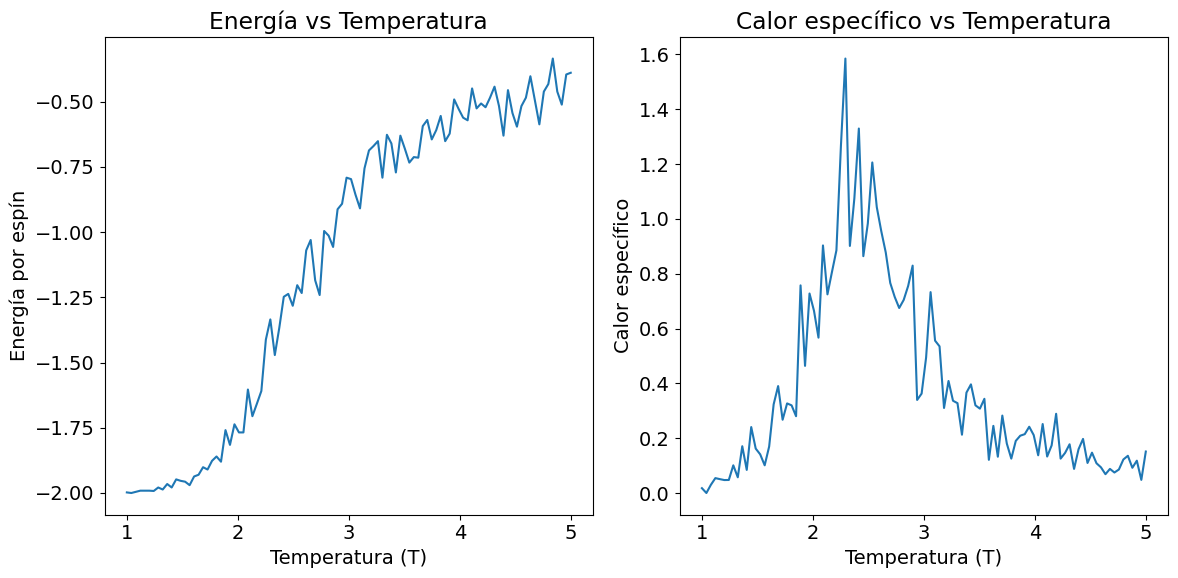

In [6]:


# Inicialización de una red 6x6 con spins aleatorios (+1 o -1)
L = 6
N = L * L  # Número total de espines
J = 1  # Interacción entre espines
k_B = 1  # Constante de Boltzmann

# Generamos la red inicial aleatoriamente con espines +1 o -1
def inicializar_red(L):
    return np.random.choice([-1, 1], size=(L, L))

# Función para obtener los vecinos (con condiciones de borde periódicas)
def obtener_vecinos(i, j, L):
    return [
        ((i + 1) % L, j),  # Vecino de abajo
        ((i - 1) % L, j),  # Vecino de arriba
        (i, (j + 1) % L),  # Vecino de la derecha
        (i, (j - 1) % L)   # Vecino de la izquierda
    ]

# Algoritmo de Wolff
def wolff_step(red, T):
    L = len(red)
    p = 1 - math.exp(-2 * J / T)  # Probabilidad de agregar un espín al cluster
    i, j = random.randint(0, L - 1), random.randint(0, L - 1)  # Elegimos un sitio inicial al azar
    cluster = {(i, j)}  # El cluster empieza con el sitio inicial
    frontera = [(i, j)]  # Inicializamos la frontera
    spin_inicial = red[i, j]
    
    while frontera:
        i, j = frontera.pop()
        for vecino in obtener_vecinos(i, j, L):
            x, y = vecino
            if (x, y) not in cluster and red[x, y] == spin_inicial:
                if random.random() < p:
                    cluster.add((x, y))
                    frontera.append((x, y))
    
    # Cambiamos los spins en el cluster
    for i, j in cluster:
        red[i, j] *= -1
    
    return red

# Función para calcular la energía total de la red
def calcular_energia(red):
    L = len(red)
    energia = 0
    for i in range(L):
        for j in range(L):
            for vecino in obtener_vecinos(i, j, L):
                x, y = vecino
                energia -= J * red[i, j] * red[x, y]  # Energía de interacción con los vecinos
    return energia / 2  # Para evitar contar interacciones dos veces

# Función para calcular el calor específico
def calcular_calor_especifico(energias, T):
    energia_promedio = np.mean(energias)
    energia_cuadrado_promedio = np.mean(np.array(energias) ** 2)
    return (energia_cuadrado_promedio - energia_promedio ** 2) / (T ** 2 * N)

# Simulación para un rango de temperaturas
def simulacion_wolff(L, T_min, T_max, pasos, termalizacion=1000):
    red = inicializar_red(L)
    temperaturas = np.linspace(T_min, T_max, pasos)
    energia_por_temp = []
    calor_especifico_por_temp = []

    for T in temperaturas:
        # Termalización
        for _ in range(termalizacion):
            wolff_step(red, T)
        
        # Medimos energía
        energias = []
        for _ in range(100):  # 100 mediciones por cada temperatura
            wolff_step(red, T)
            energias.append(calcular_energia(red))
        
        # Calculamos energía promedio y calor específico
        energia_promedio = np.mean(energias)
        calor_especifico = calcular_calor_especifico(energias, T)
        
        energia_por_temp.append(energia_promedio / N)
        calor_especifico_por_temp.append(calor_especifico)

    return temperaturas, energia_por_temp, calor_especifico_por_temp

# Parámetros de simulación
T_min = 1  # Temperatura mínima
T_max = 5 # Temperatura máxima
pasos = 100   # Número de puntos de temperatura

# Ejecutamos la simulación
temperaturas, energias, calores = simulacion_wolff(L, T_min, T_max, pasos)

# Mostramos los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(temperaturas, energias, '-')
plt.xlabel('Temperatura (T)')
plt.ylabel('Energía por espín')
plt.title('Energía vs Temperatura')

plt.subplot(1, 2, 2)
plt.plot(temperaturas, calores, '-')
plt.xlabel('Temperatura (T)')
plt.ylabel('Calor específico')
plt.title('Calor específico vs Temperatura')

plt.tight_layout()
plt.show()


Temperatura  |  Energía por espín  |  Calor específico
-----------------------------------------------------
      0.50  |         -2.000000  |        0.000000
      1.00  |         -2.000000  |        0.000000
      1.50  |         -1.940000  |        0.183388
      2.00  |         -1.796667  |        0.413456
      2.50  |         -1.338889  |        0.969067
      3.00  |         -0.866667  |        0.510617
      3.50  |         -0.632222  |        0.307443
      4.00  |         -0.545556  |        0.142831


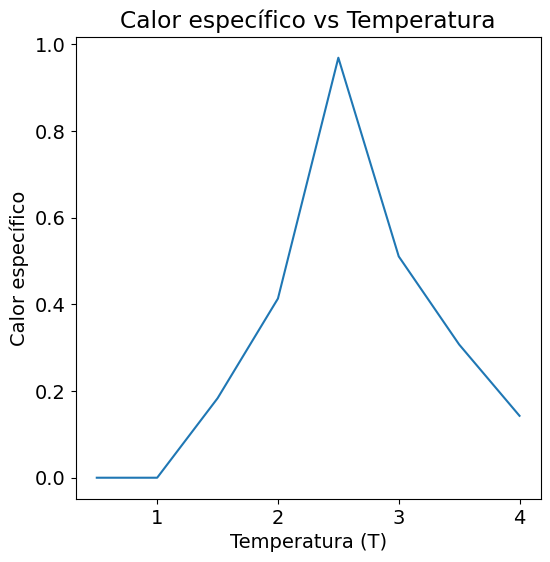

In [7]:



# Inicialización de una red 6x6 con spins aleatorios (+1 o -1)
L = 6
N = L * L  # Número total de espines
J = 1  # Interacción entre espines
k_B = 1  # Constante de Boltzmann

# Generamos la red inicial aleatoriamente con espines +1 o -1
def inicializar_red(L):
    return np.random.choice([-1, 1], size=(L, L))

# Función para obtener los vecinos (con condiciones de borde periódicas)
def obtener_vecinos(i, j, L):
    return [
        ((i + 1) % L, j),  # Vecino de abajo
        ((i - 1) % L, j),  # Vecino de arriba
        (i, (j + 1) % L),  # Vecino de la derecha
        (i, (j - 1) % L)   # Vecino de la izquierda
    ]

# Algoritmo de Wolff
def wolff_step(red, T):
    L = len(red)
    if T < 0.01:  # Límite para evitar división por cero
        T = 0.01
    
    p = 1 - math.exp(-2 * J / T)  # Probabilidad de agregar un espín al cluster
    i, j = random.randint(0, L - 1), random.randint(0, L - 1)  # Elegimos un sitio inicial al azar
    cluster = {(i, j)}  # El cluster empieza con el sitio inicial
    frontera = [(i, j)]  # Inicializamos la frontera
    spin_inicial = red[i, j]
    
    while frontera:
        i, j = frontera.pop()
        for vecino in obtener_vecinos(i, j, L):
            x, y = vecino
            if (x, y) not in cluster and red[x, y] == spin_inicial:
                if random.random() < p:
                    cluster.add((x, y))
                    frontera.append((x, y))
    
    # Cambiamos los spins en el cluster
    for i, j in cluster:
        red[i, j] *= -1
    
    return red

# Función para calcular la energía total de la red
def calcular_energia(red):
    L = len(red)
    energia = 0
    for i in range(L):
        for j in range(L):
            for vecino in obtener_vecinos(i, j, L):
                x, y = vecino
                energia -= J * red[i, j] * red[x, y]  # Energía de interacción con los vecinos
    return energia / 2  # Para evitar contar interacciones dos veces

# Función para calcular el calor específico
def calcular_calor_especifico(energias, T):
    if T < 0.01:  # Evitar valores de T demasiado pequeños
        T = 0.01
    
    energia_promedio = np.mean(energias)
    energia_cuadrado_promedio = np.mean(np.array(energias) ** 2)
    return (energia_cuadrado_promedio - energia_promedio ** 2) / (T ** 2 * N)

# Simulación para un rango de temperaturas
def simulacion_wolff(L, temperaturas, termalizacion=1000):
    red = inicializar_red(L)
    energia_por_temp = []
    calor_especifico_por_temp = []

    for T in temperaturas:
        # Termalización
        for _ in range(termalizacion):
            wolff_step(red, T)
        
        # Medimos energía
        energias = []
        for _ in range(100):  # 100 mediciones por cada temperatura
            wolff_step(red, T)
            energias.append(calcular_energia(red))
        
        # Calculamos energía promedio y calor específico
        energia_promedio = np.mean(energias)
        calor_especifico = calcular_calor_especifico(energias, T)
        
        energia_por_temp.append(energia_promedio / N)
        calor_especifico_por_temp.append(calor_especifico)

    return energia_por_temp, calor_especifico_por_temp

# Rango de temperaturas de 0.5 a 4 con pasos de 0.5
temperaturas = np.arange(0.5, 4.5, 0.5)

# Ejecutamos la simulación
energias, calores = simulacion_wolff(L, temperaturas)

# Imprimimos los resultados
print("Temperatura  |  Energía por espín  |  Calor específico")
print("-----------------------------------------------------")
for T, energia, calor in zip(temperaturas, energias, calores):
    print(f"{T:10.2f}  |  {energia:16.6f}  |  {calor:14.6f}")

# Gráfica de los resultados
plt.figure(figsize=(6,6))
plt.plot(temperaturas, calores, label='Calor específico')
plt.xlabel('Temperatura (T)')
plt.ylabel('Calor específico')
plt.title('Calor específico vs Temperatura')
plt.show()



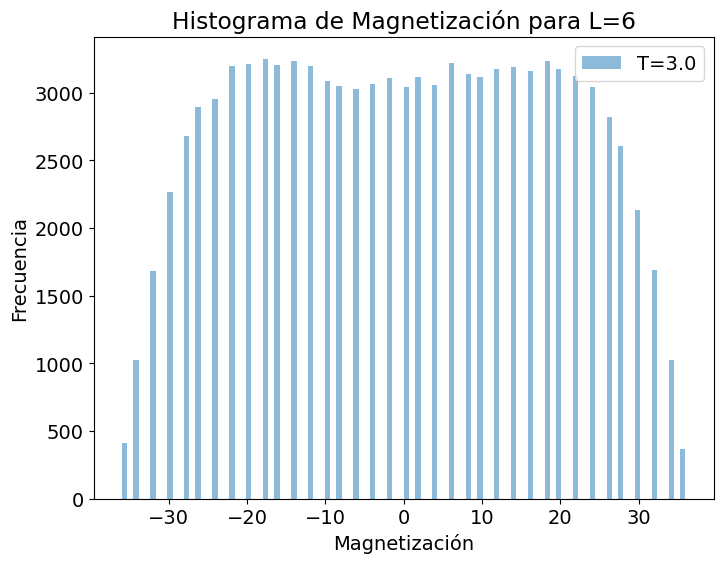

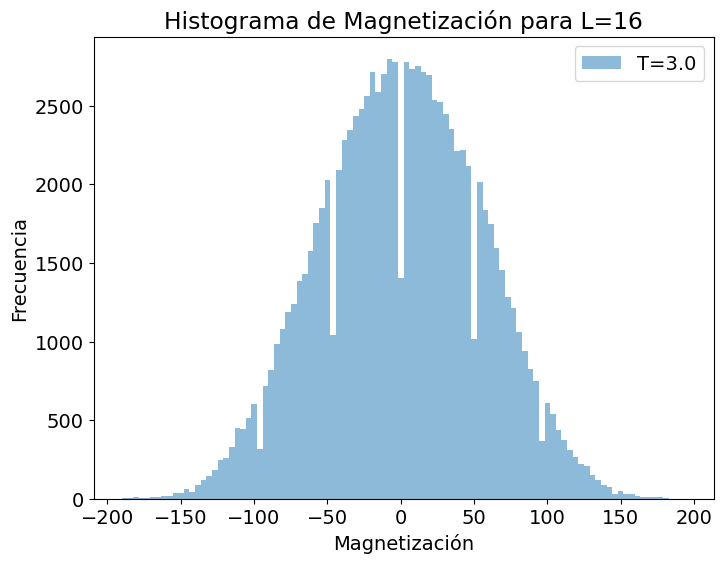

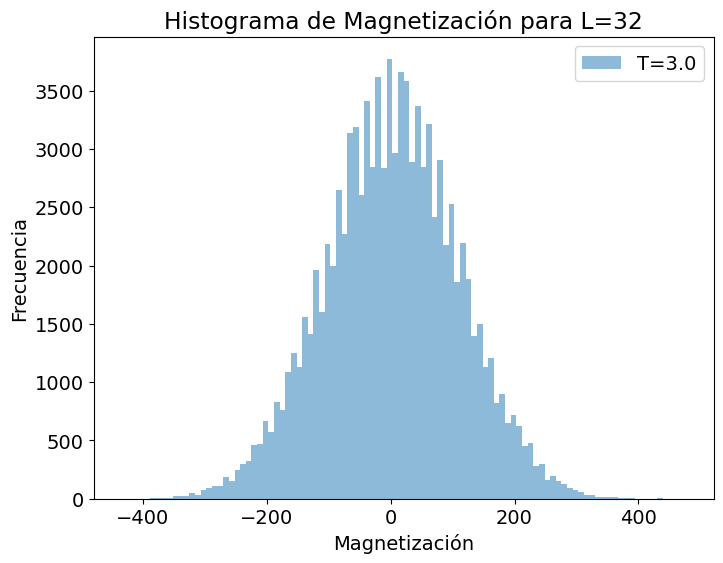

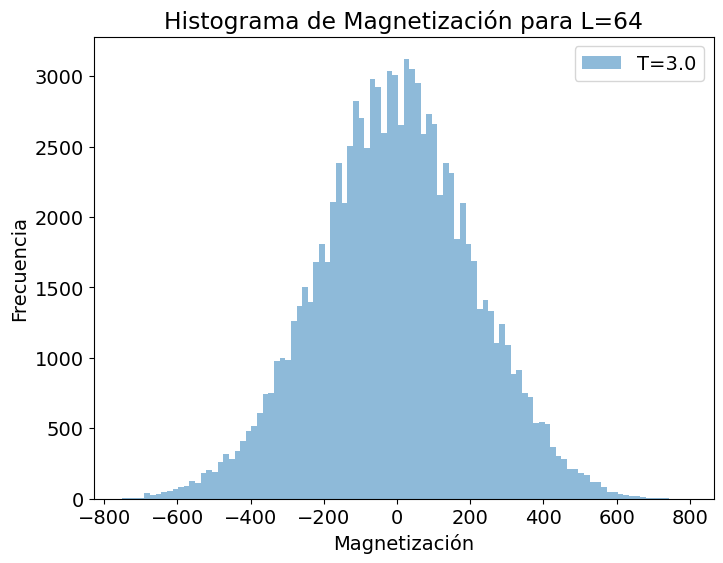

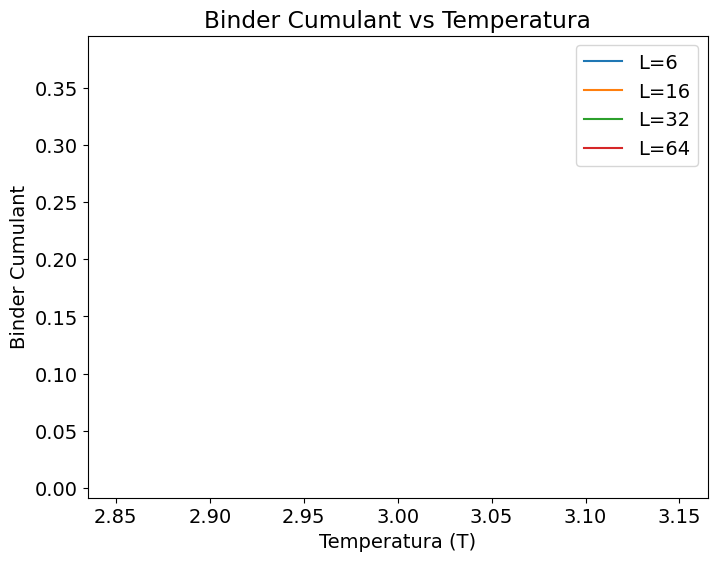

In [8]:


# Funciones de inicialización y cálculo ya definidas

# Calcula la magnetización de la red
def calcular_magnetizacion(red):
    return np.sum(red)

# Función para simular la magnetización y Binder cumulant
def simulacion_magnetizacion_binder(L, temperaturas, termalizacion=1000):
    red = inicializar_red(L)
    magnetizacion_por_temp = []
    binder_por_temp = []
    
    for T in temperaturas:
        # Termalización
        for _ in range(termalizacion):
            wolff_step(red, T)
        
        # Medimos magnetización
        magnetizaciones = []
        for _ in range(100000):  
            wolff_step(red, T)
            magnetizacion = calcular_magnetizacion(red)
            magnetizaciones.append(magnetizacion)
        
        # Cálculo de momentos de magnetización
        M2 = np.mean(np.array(magnetizaciones) ** 2)
        M4 = np.mean(np.array(magnetizaciones) ** 4)
        
        # Calcular Binder cumulant
        if M2 != 0:
            binder = 1 - (M4 / (3 * M2 ** 2))
        else:
            binder = 0
        
        magnetizacion_por_temp.append(magnetizaciones)
        binder_por_temp.append(binder)

    return magnetizacion_por_temp, binder_por_temp

# Rango de temperaturas y tamaños de red
temperaturas = np.arange(3,3.5 , 0.5)
tamanos_red = [6, 16, 32, 64]

# Almacenamos los resultados de magnetización y Binder cumulants
resultados_magnetizacion = {}
resultados_binder = {}

# Simulación para diferentes tamaños de red
for L in tamanos_red:
    magnetizaciones, binders = simulacion_magnetizacion_binder(L, temperaturas)
    resultados_magnetizacion[L] = magnetizaciones
    resultados_binder[L] = binders

# Graficamos los histogramas de magnetización
for L in tamanos_red:
    plt.figure(figsize=(8,6))
    for i, T in enumerate(temperaturas):
        plt.hist(resultados_magnetizacion[L][i], bins=100, alpha=0.5, label=f"T={T}")
    plt.title(f"Histograma de Magnetización para L={L}")
    plt.xlabel("Magnetización")
    plt.ylabel("Frecuencia")
    plt.legend(loc='upper right')
    plt.show()

# Graficamos el Binder cumulant como función de la temperatura
plt.figure(figsize=(8,6))
for L in tamanos_red:
    plt.plot(temperaturas, resultados_binder[L], label=f"L={L}")
plt.xlabel('Temperatura (T)')
plt.ylabel('Binder Cumulant')
plt.title('Binder Cumulant vs Temperatura')
plt.legend()
plt.show()


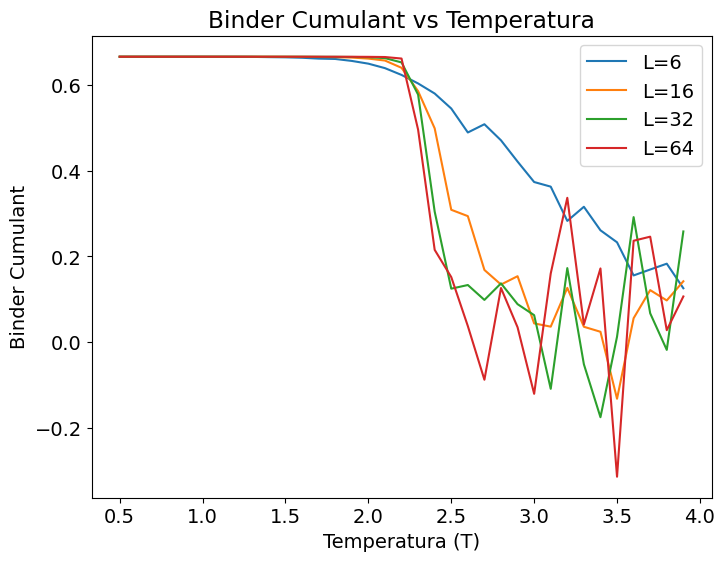

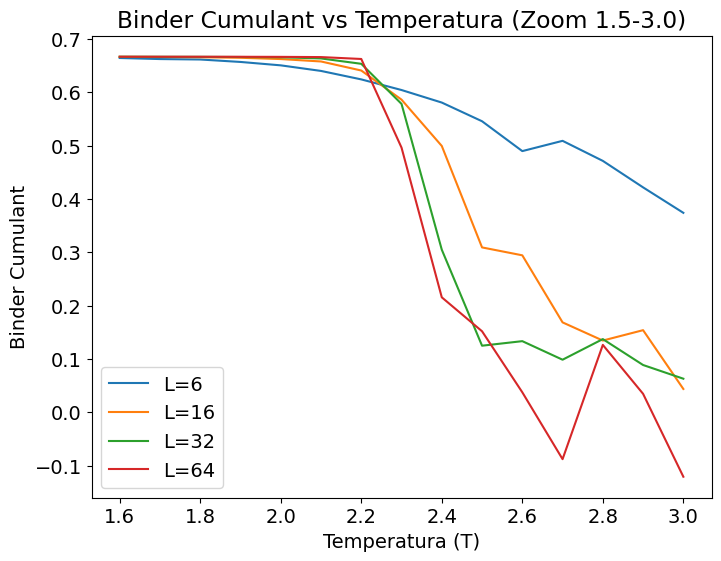

In [9]:


# Inicialización de la red
def inicializar_red(L):
    return np.random.choice([-1, 1], size=(L, L))

# Calcula la magnetización de la red
def calcular_magnetizacion(red):
    return np.sum(red)

# Simulación de Binder cumulant únicamente
def simulacion_binder(L, temperaturas, termalizacion=1000):
    red = inicializar_red(L)
    binder_por_temp = []
    
    for T in temperaturas:
        # Termalización
        for _ in range(termalizacion):
            wolff_step(red, T)
        
        # Medimos momentos de la magnetización
        magnetizaciones = []
        for _ in range(1000):  # Reducimos el número de pasos para acelerar el cálculo
            wolff_step(red, T)
            magnetizacion = calcular_magnetizacion(red)
            magnetizaciones.append(magnetizacion)
        
        # Cálculo de momentos de magnetización
        M2 = np.mean(np.array(magnetizaciones) ** 2)
        M4 = np.mean(np.array(magnetizaciones) ** 4)
        
        # Calcular Binder cumulant
        if M2 != 0:
            binder = 1 - (M4 / (3 * M2 ** 2))
        else:
            binder = 0
        
        binder_por_temp.append(binder)

    return binder_por_temp

# Rango de temperaturas y tamaños de red
temperaturas = np.arange(0.5, 4, 0.1)
tamanos_red = [6, 16, 32, 64]

# Almacenamos los resultados de Binder cumulants
resultados_binder = {}

# Simulación para diferentes tamaños de red (solo Binder cumulants)
for L in tamanos_red:
    binders = simulacion_binder(L, temperaturas)
    resultados_binder[L] = binders

# Graficamos el Binder cumulant como función de la temperatura
plt.figure(figsize=(8,6))
for L in tamanos_red:
    plt.plot(temperaturas, resultados_binder[L], label=f"L={L}")
plt.xlabel('Temperatura (T)')
plt.ylabel('Binder Cumulant')
plt.title('Binder Cumulant vs Temperatura')
plt.legend()
plt.show()

# Función para hacer zoom en un rango específico
def plot_zoom_binder(resultados_binder, temperaturas, tamanos_red, T_min, T_max):
    plt.figure(figsize=(8,6))
    mask = (temperaturas >= T_min) & (temperaturas <= T_max)  # Filtramos las temperaturas en el rango de zoom
    for L in tamanos_red:
        plt.plot(temperaturas[mask], np.array(resultados_binder[L])[mask], label=f"L={L}")
    plt.xlabel('Temperatura (T)')
    plt.ylabel('Binder Cumulant')
    plt.title(f'Binder Cumulant vs Temperatura (Zoom {T_min}-{T_max})')
    plt.legend()
    plt.show()

# Definimos el rango de zoom
T_min_zoom = 1.5
T_max_zoom = 3.0

# Graficamos el Binder cumulant con zoom en el rango de temperatura especificado
plot_zoom_binder(resultados_binder, temperaturas, tamanos_red, T_min_zoom, T_max_zoom)


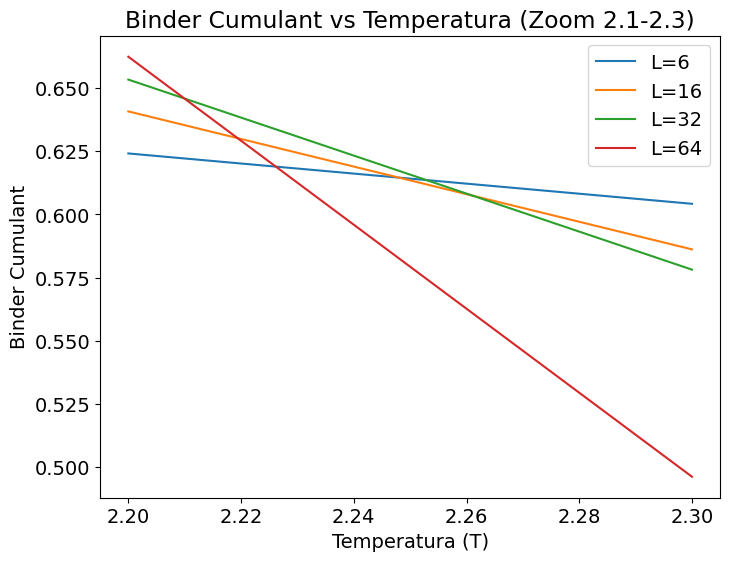

In [11]:
# Función para hacer zoom en un rango específico
def plot_zoom_binder(resultados_binder, temperaturas, tamanos_red, T_min, T_max):
    plt.figure(figsize=(8,6))
    mask = (temperaturas >= T_min) & (temperaturas <= T_max)  # Filtramos las temperaturas en el rango de zoom
    for L in tamanos_red:
        plt.plot(temperaturas[mask], np.array(resultados_binder[L])[mask], label=f"L={L}")
    plt.xlabel('Temperatura (T)')
    plt.ylabel('Binder Cumulant')
    plt.title(f'Binder Cumulant vs Temperatura (Zoom {T_min}-{T_max})')
    plt.legend()
    plt.show()

# Definimos el rango de zoom
T_min_zoom = 2.1
T_max_zoom = 2.3

# Graficamos el Binder cumulant con zoom en el rango de temperatura especificado
plot_zoom_binder(resultados_binder, temperaturas, tamanos_red, T_min_zoom, T_max_zoom)
